In [1]:
import pandas as pd
import numpy as np
 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
 
X = data
y = target

Regularyzacja L1 oraz L2

In [2]:
#1
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=10)

In [3]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [4]:
#2
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
Y_predict = linear_reg.predict(X_test)

In [5]:

Y_train_predict = linear_reg.predict(X_train)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

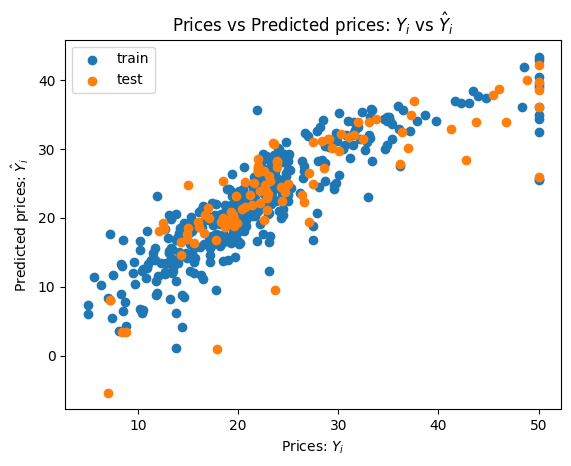

In [6]:
from matplotlib import pyplot as plt
plt.scatter(y_train, Y_train_predict, label='train')
plt.scatter(y_test, Y_predict, label='test')
plt.legend()
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [24]:
from sklearn.metrics import mean_squared_error
#3 
print("Mean Squared Error:",mean_squared_error(y_test,Y_predict))
#4
print("Model Score:", linear_reg.score(X_test, y_test))

Mean Squared Error: 34.41396845313853
Model Score: 0.6709339839115631


In [16]:
from sklearn.preprocessing import PolynomialFeatures
 
polynomial_features = PolynomialFeatures(degree=2)
X_test_new = polynomial_features.fit_transform(X_test,y_test)
X_train_new = polynomial_features.fit_transform(X_train,y_train)

In [17]:
linear_reg_new = LinearRegression()
linear_reg_new.fit(X_train_new, y_train)
Y_predict_new = linear_reg_new.predict(X_test_new)
Y_predict_train_new = linear_reg_new.predict(X_train_new)

In [25]:
print("Mean Squared Error test:",mean_squared_error(y_test,Y_predict_new))
print("Mean Squared Error train:",mean_squared_error(y_train,Y_predict_train_new))
print("Model Score:", linear_reg_new.score(X_test_new, y_test))

Mean Squared Error test: 13.072867019901294
Mean Squared Error train: 5.239260173984538
Model Score: 0.874997378609484


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

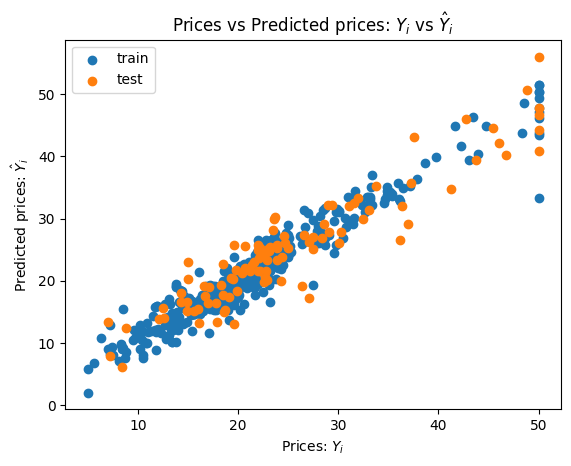

In [20]:
plt.scatter(y_train, Y_predict_train_new, label='train')
plt.scatter(y_test, Y_predict_new, label='test')
plt.legend()
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [35]:
from sklearn.linear_model import Ridge, Lasso
#5
alpha = np.linspace(.001, 10, 5)
mse = []
score = []
for a in alpha:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    Y_predict = lasso.predict(X_test)
    mse_ = mean_squared_error(y_test, Y_predict)
    score_ = lasso.score(X_test,y_test)
    print("Alpha:", a)
    print("Mean Squared Error:", mse_)
    print("Model Score:", score_)
    print('\n')
    mse.append(mse_)
    score.append(score_)

Alpha: 0.001
Mean Squared Error: 34.44361038642308
Model Score: 0.6706505480471876


Alpha: 2.50075
Mean Squared Error: 56.60767383664743
Model Score: 0.45871799891882636


Alpha: 5.000500000000001
Mean Squared Error: 60.66680901126171
Model Score: 0.4199045896924647


Alpha: 7.50025
Mean Squared Error: 62.8400168688293
Model Score: 0.39912439827700374


Alpha: 10.0
Mean Squared Error: 65.51795873785507
Model Score: 0.3735179453810906




Text(0, 0.5, 'Mean Squared Error')

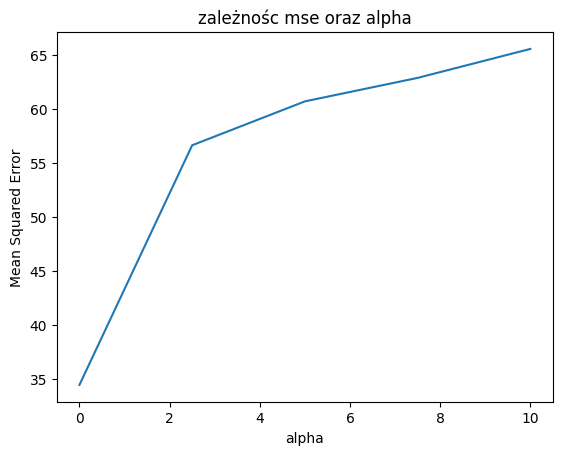

In [37]:
plt.plot(alpha, mse)
plt.title("zależność mse oraz alpha")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'model score')

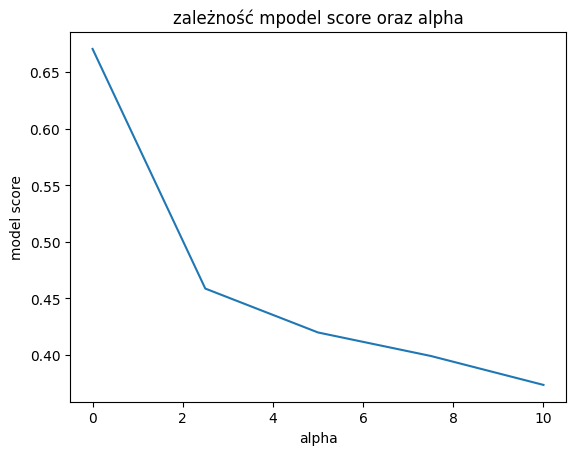

In [38]:
plt.plot(alpha, score)
plt.title("zależność mpodel score oraz alpha")
plt.xlabel("alpha")
plt.ylabel("model score")

In [39]:
#6
alpha = np.linspace(.001, 10, 5)
mse = []
score = []
for a in alpha:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    Y_predict = ridge.predict(X_test)
    mse_ = mean_squared_error(y_test, Y_predict)
    score_ = ridge.score(X_test,y_test)
    print("Alpha:", a)
    print("Mean Squared Error:", mse_)
    print("Model Score:", score_)
    print('\n')
    mse.append(mse_)
    score.append(score_)

Alpha: 0.001
Mean Squared Error: 34.41464655589765
Model Score: 0.6709274998998821


Alpha: 2.50075
Mean Squared Error: 35.45477894375127
Model Score: 0.6609817645935452


Alpha: 5.000500000000001
Mean Squared Error: 35.909755981108276
Model Score: 0.6566312787930291


Alpha: 7.50025
Mean Squared Error: 36.22228038527356
Model Score: 0.6536429236212296


Alpha: 10.0
Mean Squared Error: 36.47664109608868
Model Score: 0.6512107290932625




Text(0, 0.5, 'Mean Squared Error')

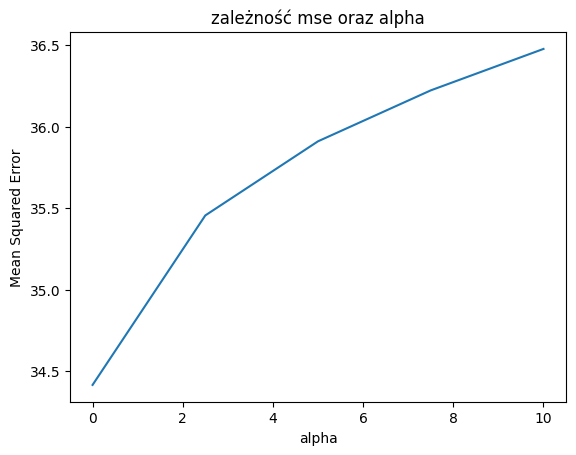

In [40]:
plt.plot(alpha, mse)
plt.title("zależność mse oraz alpha")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'model score')

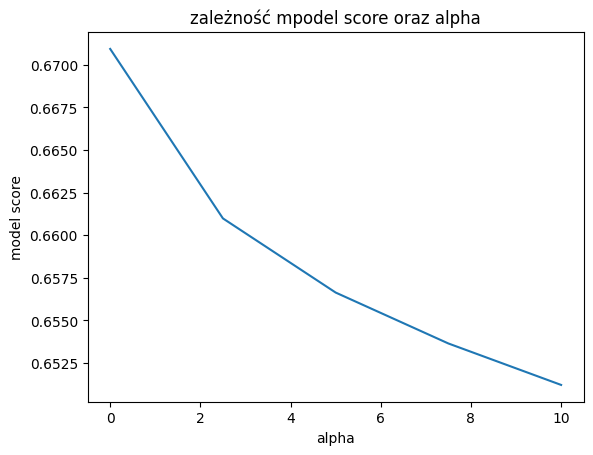

In [41]:
plt.plot(alpha, score)
plt.title("zależność mpodel score oraz alpha")
plt.xlabel("alpha")
plt.ylabel("model score")

Regularyzacja

In [55]:
path = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
dataset = pd.read_csv(path, na_values='?', dtype={'ID': str})
dataset.columns = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

In [43]:
#1
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [44]:
dataset.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [56]:
dataset.isnull().any()

ID                             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [57]:
dataset["Bare Nuclei"] = dataset["Bare Nuclei"].fillna(dataset["Bare Nuclei"].mean())

In [58]:
dataset.isnull().any()

ID                             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [61]:
#2
dataset_n_id = dataset.drop(columns=["ID"])

In [62]:
dataset_n_id.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [64]:
dataset_new = dataset_n_id

In [65]:
dataset_new["Class"] = dataset_n_id["Class"].replace("benign",0)
dataset_new["Class"] = dataset_n_id["Class"].replace("malignant",1)

In [67]:
dataset_new.head(4)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0


In [68]:
#3
X_train,X_test,y_train,y_test = train_test_split(dataset_new.drop(columns=["Class"]),dataset["Class"],test_size = 0.2)

In [77]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

alpha = np.linspace(.0001, 10, 5)
accuracy = []
for c in alpha:
    logistic_reg = LogisticRegression(penalty='l2',C = c, solver='liblinear')
    logistic_reg.fit(X_train,y_train)
    Y_predict = logistic_reg.predict(X_test)
    acc_ = metrics.accuracy_score(y_test, Y_predict)
    print("Alpha:", c)
    print("Accuracy:", acc_)
    print('\n')
    accuracy.append(acc_)

Alpha: 0.0001
Accuracy: 0.2642857142857143


Alpha: 2.5000750000000003
Accuracy: 0.9785714285714285


Alpha: 5.00005
Accuracy: 0.9714285714285714


Alpha: 7.500025
Accuracy: 0.9714285714285714


Alpha: 10.0
Accuracy: 0.9714285714285714




Text(0, 0.5, 'accuracy')

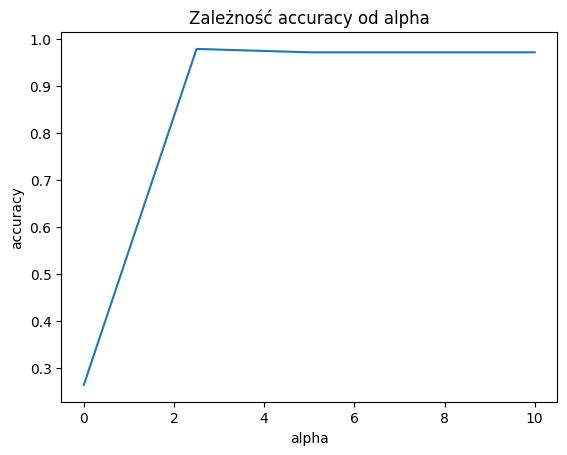

In [79]:
plt.plot(alpha,accuracy)
plt.title("Zależność accuracy od alpha")
plt.xlabel("alpha")
plt.ylabel("accuracy")